[INFO] SXR8.DE: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] SXR8.DE is already up to date.
[INFO] EUNL.DE: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] EUNL.DE is already up to date.
[INFO] VGWE.DE: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] VGWE.DE is already up to date.
[INFO] NVDA: No data found. Downloading from 2000-01-01...
[INFO] Saved 6519 records to database.
[INFO] AAPL: No data found. Downloading from 2000-01-01...
[INFO] Saved 6519 records to database.
=== OPTIMIZED WEIGHTS ===
         Max Sharpe  Min Volatility
symbol                             
AAPL         0.0904          0.1023
EUNL.DE      0.0000          0.3977
NVDA         0.2937          0.0000
SXR8.DE      0.1160          0.0000
VGWE.DE      0.5000          0.5000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17856\4110112869.py:19: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


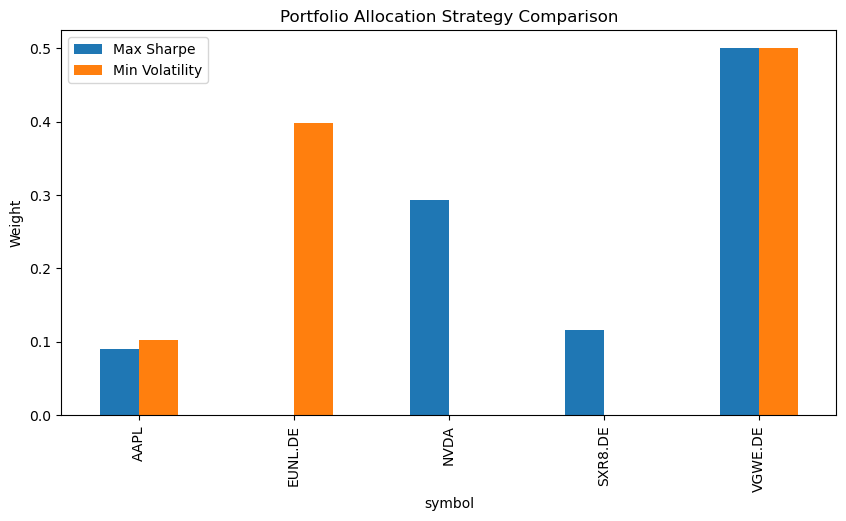

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2
sys.path.append(os.path.abspath('..'))

from src.database import MarketDB
from src.optimization import OptimizationEngine

# 1. Load Data
db = MarketDB()
# Adding Nvidia (High Vol) and Bonds (Low Vol) to see clear differences
tickers = ["SXR8.DE", "EUNL.DE", "VGWE.DE", "NVDA", "AAPL"] 
db.update_tickers(tickers)
prices = db.get_prices(tickers)
returns = prices.pct_change().dropna()

# 2. Initialize Optimizer
opt = OptimizationEngine(returns)

# 3. Run Optimizations
# Scenario A: Maximize Sharpe (Aggressive)
w_sharpe = opt.maximize_sharpe(risk_free_rate=0.02, max_weight=0.5)

# Scenario B: Minimize Volatility (Conservative)
w_min_vol = opt.minimize_volatility(max_weight=0.5)

# 4. Compare Results
results = pd.DataFrame({"Max Sharpe": w_sharpe, "Min Volatility": w_min_vol})

print("=== OPTIMIZED WEIGHTS ===")
print(results.round(4))

# 5. Visualize Allocation
results.plot(kind='bar', figsize=(10, 5))
plt.title("Portfolio Allocation Strategy Comparison")
plt.ylabel("Weight")
plt.show()